## Importing Libraries

In [4]:
# Importing Libraries
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

In [6]:
# Data Preprocessing
# 1) Training Image Preprocessing

training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [7]:
# 2) Validation Image Preprocessing

validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


## Building Model

In [19]:
# Building Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [20]:
model = Sequential()

### Building Convolution Layer

In [21]:
## Building Convolution Layer
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = [128,128,3]))
model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [22]:
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [23]:
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [24]:
model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 256, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [25]:
model.add(Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 512, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [26]:
model.add(Dropout(0.25))

In [27]:
model.add(Flatten())

In [28]:
model.add(Dense(units = 1500, activation = 'relu'))

In [29]:
model.add(Dropout(0.4))

### Output Layer

In [30]:
# Output Layer
model.add(Dense(units = 38, activation = 'softmax'))

In [31]:
# Compiling Model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_14 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_16 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

## Training Model

In [33]:
# Training
training_history = model.fit(x = training_set, validation_data = validation_set, epochs = 15)

Epoch 1/15
2197/2197 [==============================] - 250s 109ms/step - loss: 1.3074 - accuracy: 0.6105 - val_loss: 0.5573 - val_accuracy: 0.8219
Epoch 2/15
2197/2197 [==============================] - 244s 111ms/step - loss: 0.4467 - accuracy: 0.8583 - val_loss: 0.3076 - val_accuracy: 0.9021
Epoch 3/15
2197/2197 [==============================] - 268s 122ms/step - loss: 0.2719 - accuracy: 0.9124 - val_loss: 0.2088 - val_accuracy: 0.9312
Epoch 4/15
2197/2197 [==============================] - 279s 127ms/step - loss: 0.1884 - accuracy: 0.9379 - val_loss: 0.1652 - val_accuracy: 0.9468
Epoch 5/15
2197/2197 [==============================] - 287s 130ms/step - loss: 0.1368 - accuracy: 0.9547 - val_loss: 0.1670 - val_accuracy: 0.9450
Epoch 6/15
2197/2197 [==============================] - 294s 134ms/step - loss: 0.1077 - accuracy: 0.9648 - val_loss: 0.1740 - val_accuracy: 0.9465
Epoch 7/15
2197/2197 [==============================] - 304s 138ms/step - loss: 0.0868 - accuracy: 0.9712 - val_

## Model Evaluation

In [34]:
# Model Evaluation
train_loss, train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 92s 42ms/step - loss: 0.0238 - accuracy: 0.9927


In [36]:
print(train_loss, train_acc)

0.023824254050850868 0.9926595091819763


In [37]:
val_loss, val_acc = model.evaluate(validation_set)

550/550 [==============================] - 19s 33ms/step - loss: 0.1308 - accuracy: 0.9647


In [38]:
print(val_loss, val_acc)

0.13077525794506073 0.9647166132926941


In [40]:
model.save("trained_model.h5")

In [41]:
training_history.history

{'loss': [1.3073623180389404,
  0.446737676858902,
  0.27192002534866333,
  0.1883855015039444,
  0.13679002225399017,
  0.10765042155981064,
  0.08675358444452286,
  0.07323166728019714,
  0.061982546001672745,
  0.05932994559407234,
  0.05176040157675743,
  0.048876598477363586,
  0.041352201253175735,
  0.03841875493526459,
  0.037899650633335114],
 'accuracy': [0.610470175743103,
  0.8583398461341858,
  0.9123977422714233,
  0.9379045367240906,
  0.9547478556632996,
  0.9648339152336121,
  0.9711785912513733,
  0.9762998819351196,
  0.9804253578186035,
  0.9809944033622742,
  0.9832136034965515,
  0.9847926497459412,
  0.9866989254951477,
  0.9878227710723877,
  0.9884202480316162],
 'val_loss': [0.5572589635848999,
  0.30755993723869324,
  0.20875030755996704,
  0.1651879996061325,
  0.16701607406139374,
  0.1740267425775528,
  0.14821837842464447,
  0.15328818559646606,
  0.15367984771728516,
  0.1468687355518341,
  0.13700060546398163,
  0.11607956886291504,
  0.1097131595015525

In [42]:
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

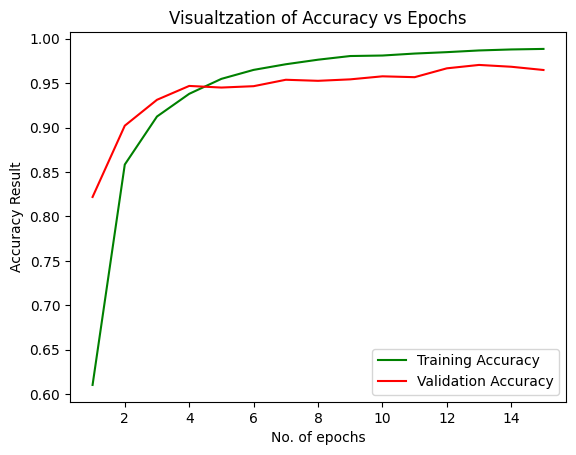

In [43]:
# Accuracy Visualization
epochs = [i for i in range(1,16)]
plt.plot(epochs, training_history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='red', label='Validation Accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualtzation of Accuracy vs Epochs")
plt.legend()
plt.show()

### Other Metrics for evaluation
![](image.png)

In [44]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [45]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle = False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [46]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 [==============================] - 17s 31ms/step


(array([[1.0000000e+00, 3.7128178e-10, 3.1252149e-12, ..., 3.8474499e-18,
         9.7486160e-17, 2.1704359e-17],
        [1.0000000e+00, 4.3019845e-14, 1.0478551e-15, ..., 1.2023893e-23,
         2.1322640e-20, 7.1250694e-22],
        [9.9999988e-01, 6.8473007e-08, 5.6776994e-10, ..., 3.8300715e-16,
         2.2952855e-13, 3.0645790e-13],
        ...,
        [6.8120863e-11, 7.8320501e-12, 4.9392359e-08, ..., 1.7062811e-11,
         1.3230666e-11, 9.9999714e-01],
        [3.9627352e-14, 6.3862573e-16, 1.3298476e-12, ..., 1.2039537e-13,
         1.9232069e-14, 1.0000000e+00],
        [2.8617761e-20, 2.1993355e-21, 4.1631791e-19, ..., 1.8007457e-20,
         2.0420407e-18, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [47]:
predicted_categories = tf.argmax(y_pred, axis = 1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [48]:
true_categories = tf.concat([y for x,y in test_set], axis = 0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [51]:
Y_true = tf.argmax(true_categories, axis = 1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(classification_report(Y_true, predicted_categories, target_names = class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.97      0.97       504
                                 Apple___Black_rot       0.97      1.00      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.95      0.97       440
                                   Apple___healthy       0.97      0.96      0.97       502
                               Blueberry___healthy       0.99      0.96      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.89      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.97      0.

In [54]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[487,   5,   0, ...,   0,   0,   0],
       [  0, 496,   0, ...,   0,   0,   0],
       [  0,   2, 419, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 470,   0,   0],
       [  0,   0,   0, ...,   0, 437,   0],
       [  0,   0,   0, ...,   0,   0, 480]], dtype=int64)

### Confusion Matrix Visualization

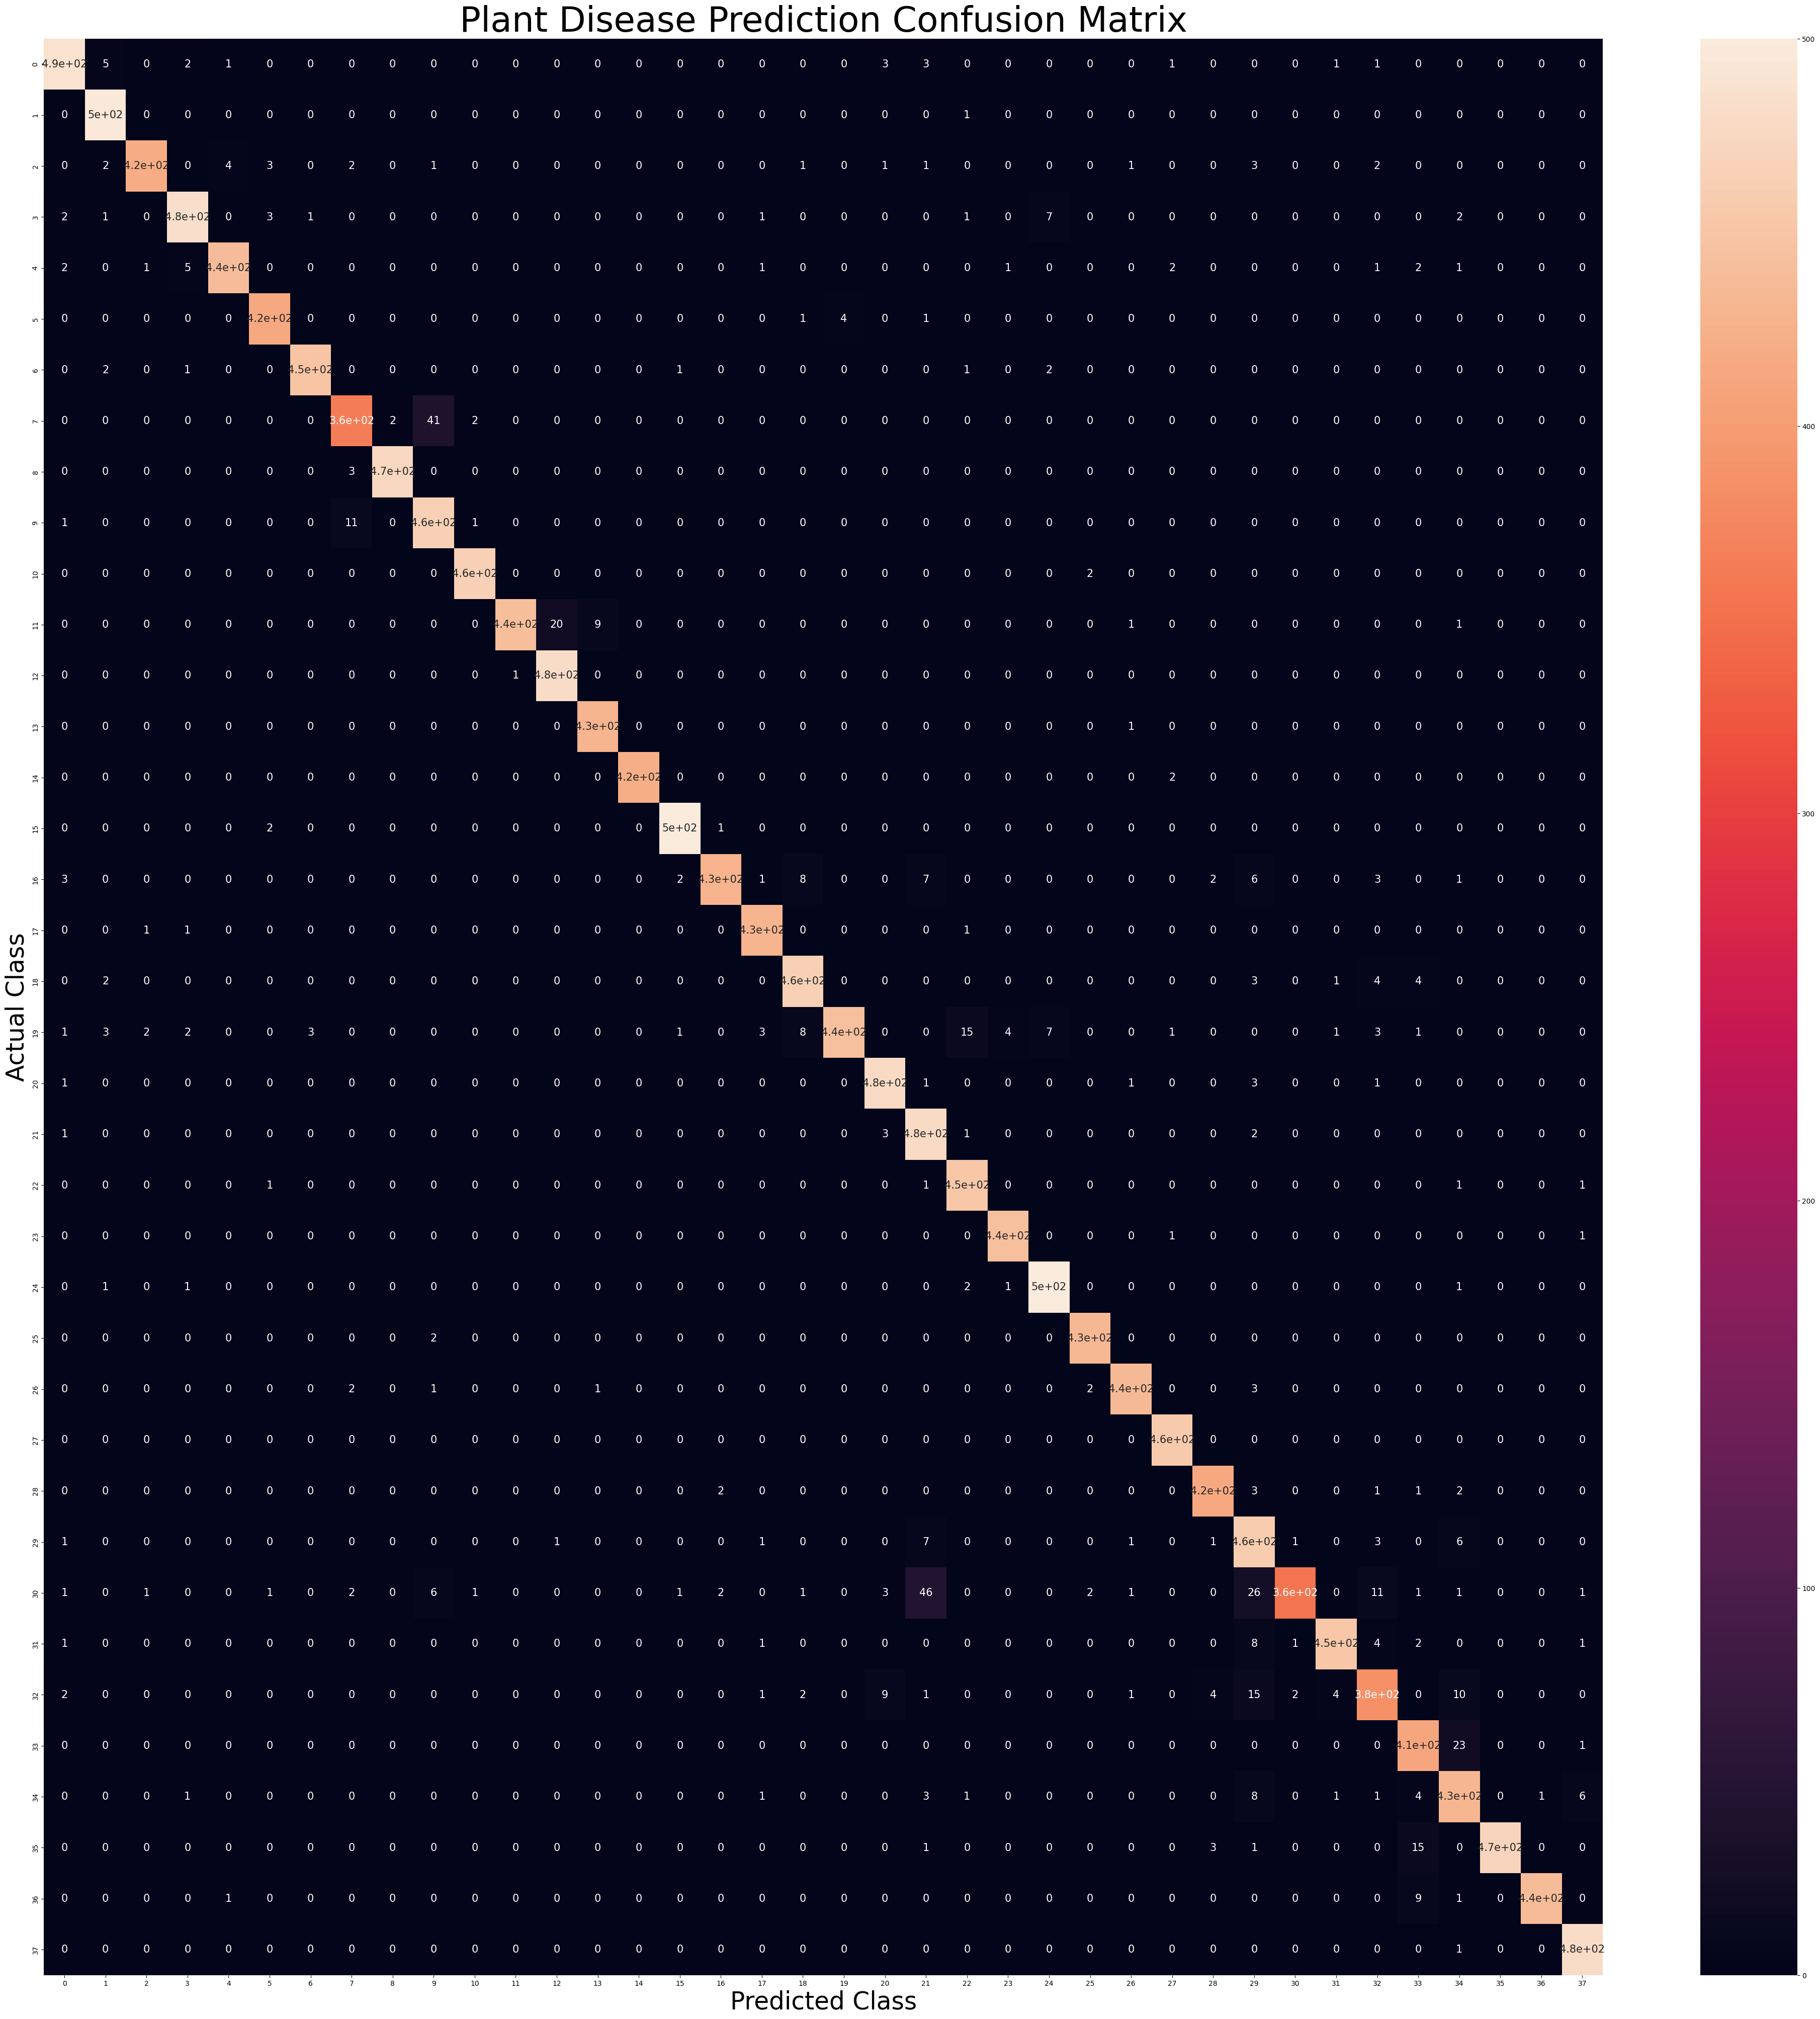

In [55]:
## Confusion Matrix Visualization
plt.figure(figsize=(50,50))
sns.heatmap(cm, annot= True, annot_kws = {'size' : 15})
plt.xlabel("Predicted Class", fontsize = 35)
plt.ylabel("Actual Class", fontsize = 35)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize = 50)
plt.show()